# Laboratorio 2 Información y Asortividad en Grafos

En este laboratorio utilizaremos la librería Networkx para crear distintos grafos y utilizar sus métodos/funciones para analizar algunas de las propiedades de los grafos vistas en clases.


Contenidos:

1.   Grafos Aleatorios.
2.   Grados de un nodo y Densidad de un grafo.
3.   Subgrafos.
4.   Matriz de Adyacencia.
5.   Atributos de un Nodo y Asortatividad.

In [1]:
import networkx as nx
%matplotlib inline

# Creación de Grafo Aleatorio
La librería networkx proporciona funciones que permiten la creación de grafos aleatorios y predeterminados [Generador de Grafos](https://networkx.org/documentation/stable/reference/generators.html). En los próximos laboratorios iremos trabajando con alguno de estos ejemplos.  
Ahora se muestra un grafo no direccionado [petersen_graph](https://networkx.org/documentation/stable/reference/generated/networkx.generators.small.petersen_graph.html#petersen-graph).

Luego, un grafo direccionado creado aleatoriamente.

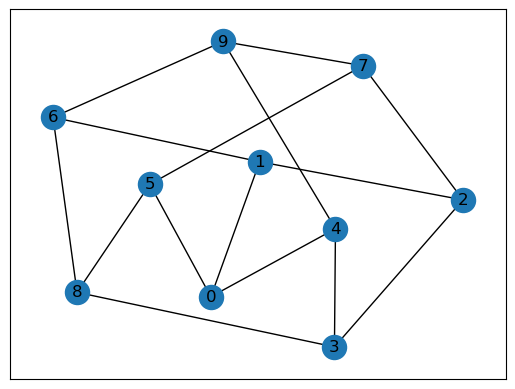

In [2]:
G = nx.petersen_graph()
# Dibuja el grafo
nx.draw_networkx(G, with_labels=True)


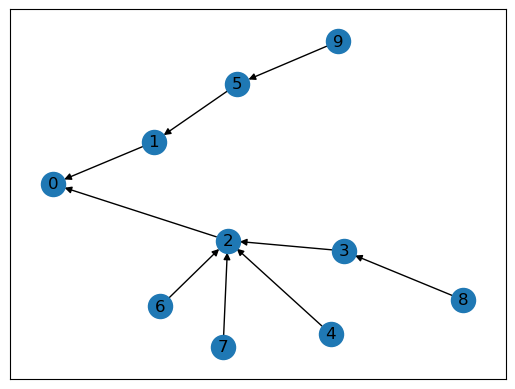

In [3]:
G_directed = nx.gn_graph(10, seed = 1)
nx.draw_networkx(G_directed, with_labels=True)

# Grado de nodo y Grado promedio

Una de las preguntas más importantes que podemos hacer sobre un nodo en un grafo es cuántos otros nodos conecta. Utilizando el método `.neighbors()` de arriba, podríamos formular esta pregunta de la siguiente manera:

In [4]:
print(len(list(G.neighbors(0))))


3


Pero esta es una tarea tan común que NetworkX nos proporciona un método del grafo, para hacer esto de una manera mucho más clara:

In [5]:
print("Grados del Nodo 0:",G.degree(0))

Grados del Nodo 0: 3


También podemos calcular los grados entrantes y saliente de un nodo en un grafo direccionado.
O los grados totales que serían los entrantes más salientes.

In [6]:
print("Nodos entrantes:", G_directed.in_degree(2))
print("Nodos salientes:",G_directed.out_degree(2))
# Si Utilizamos degree
print("Grados Totales:",G_directed.degree(2))

Nodos entrantes: 4
Nodos salientes: 1
Grados Totales: 5


# Densidad del Grafo

La función `density()` nos proporciona la densidad de un grafo, la cual nos permite cuantificar la noción de conectividad.

In [7]:
nx.density(G)

0.3333333333333333

# Extraer un Subgrafo

Si deseamos extraer un subgrafo lo podemos realizar mediante el método .subgraph(lista_nodos), el cual nos crea un nuevo grafo que corresponde al grafo original solo con los nodos mencionados.

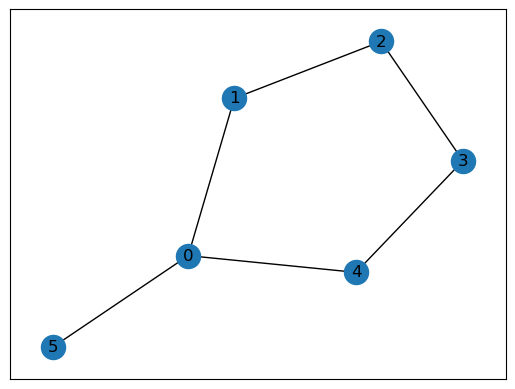

In [8]:
G_sub = G.subgraph([0,1,2,3,4,5])
nx.draw_networkx(G_sub, with_labels=True)

# Matriz de Adyacencia del Grafo
Para obtener la matrix de adyacencia de un grafo se tiene la función adjacency_matrix(). La cual nos entrega una matrix comprimida como una lista de adyacencia.

In [9]:
A = nx.adjacency_matrix(G_sub)
# Utilizamos .todense para ver la lista de adyacencia como matriz.
print(A.todense())

[[0 1 0 0 1 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [1 0 0 1 0 0]
 [1 0 0 0 0 0]]


## Guardar y Cargar lista de Adyacencia

Como sabemos una lista de adyacencia es una forma de poder guardar listas. A continuación se presenta como guardar el grafo G y posteriormente con la lista guardada cargar un nuevo grafo "G_new" que será exactamente igual a G.

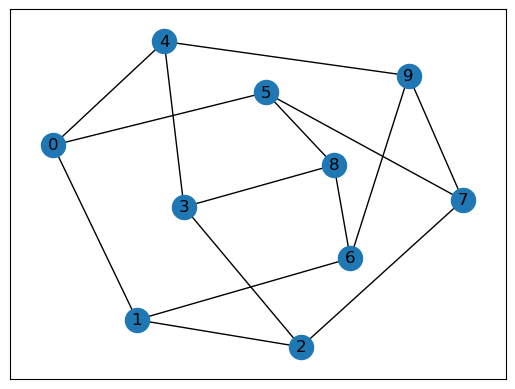

In [11]:
#Guardar lista de adyacencia
nx.write_adjlist(G, "A_list")

# Crear un grafo desde una lista de adyacencia
G_new = nx.read_adjlist("./A_list")
nx.draw_networkx(G_new, with_labels=True)

# Atributos en un nodo

Para ver como podemos otorgarle cierto atributo a un nodo, utilizaremos la función degree la cual calcula los grados de cada uno de los nodos del grafo G_sub y nos devuelve un diccionario donde cada nodo tiene un valor (sus grados).

In [12]:
bb = dict(nx.degree(G_sub))
bb

{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 1}

Ahora simplemente tenemos que atribuirle dicho diccionario al grafo como el atributo grado.

In [13]:
nx.set_node_attributes(G_sub, bb, "Grado")
#isinstance(bb, dict)
G_sub.nodes[1]["Grado"]

2

## Asortatividad

La asortatividad de un grafo G_sub con respecto a un atributo ("Grados" en este caso) se puede calcular mediante la funcion attribute_assortativity_coefficient, especificando el grafo y cual de los atributos se quiere utilizar para calcular la assortatividad.

También podemos calcular la correlación de pearson como lo hemos visto en clases.

In [14]:
nx.attribute_assortativity_coefficient(G_sub, "Grado")

-0.028571428571428466

In [15]:
nx.degree_pearson_correlation_coefficient(G_sub)

-0.6363636363636364